# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
173242               2020-07-16           2020-07-15            2020-07-08   
173243               2020-07-16           2020-07-15            2020-07-08   
173244               2020-07-16           2020-07-15            2020-07-08   
173245               2020-07-16           2020-07-15            2020-07-04   
173246               2020-07-16           2020-07-15            2020-07-01   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
173242             2020-07-01 00:00:00                   NaT   
173243             2020-07-01 00:00:00                   NaT   
173244             2020-07-01 00:00:00                   NaT   
173245             2020-07-01 00:00:00                   NaT   
173246             2020-06-30 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
173242                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
173243                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
173244                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
173245                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
173246                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
173242            Casa  ...               40 - 50    F               NaN   
173243            Casa  ...               60 - 70    M               NaN   
173244            Casa  ...               30 - 40    F               NaN   
173245            Casa  ...               30 - 40    F               NaN   
173246            Casa  ...               40 - 50    M               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                      F        M
Departamento                                                        
Amazonas                                             1026.0   1417.0
Antioquia                                            5117.0   7165.0
Arauca                                                 31.0    130.0
Archipiélago de San Andrés Providencia y Santa ...      8.0     21.0
Atlántico                                            7969.0   9289.0
Barranquilla D.E.                                    9594.0  11540.0
Bogotá D.C.                                         28224.0  28606.0
Bolívar                                               674.0    871.0
Boyacá                                                265.0    278.0
Buenaventura D.E.                                     666.0   1140.0
Caldas                                                182.0    144.0
Caquetá                                                74.0     95.0
Cartagena D.T. y C.                                  5402.0   6684.0
Casanare                                               51.0     90.0
Cauca                                                 406.0    533.0
Cesar                                                 831.0    935.0
Chocó                                                1070.0   1320.0
Cundinamarca                                         2508.0   2491.0
Córdoba                                               929.0    953.0
Guainía                                                 6.0      9.0
Guaviare                                                7.0     41.0
Huila                                                 243.0    240.0
La Guajira                                            555.0    627.0
Magdalena                                             625.0    696.0
Meta                                                  385.0   1384.0
Nariño                                               2292.0   2710.0
Norte de Santander                                    318.0    394.0
Putumayo                                               65.0     85.0
Quindío                                               114.0     92.0
Risaralda                                             471.0    416.0
Santa Marta D.T. y C.                                 968.0   1006.0
Santander                                             612.0   1027.0
Sucre                                                1433.0   1619.0
Tolima                                                508.0   1161.0
Valle del Cauca                                      6561.0   7745.0
Vaupés                                                 27.0     34.0
Vichada                                                 0.0      1.0

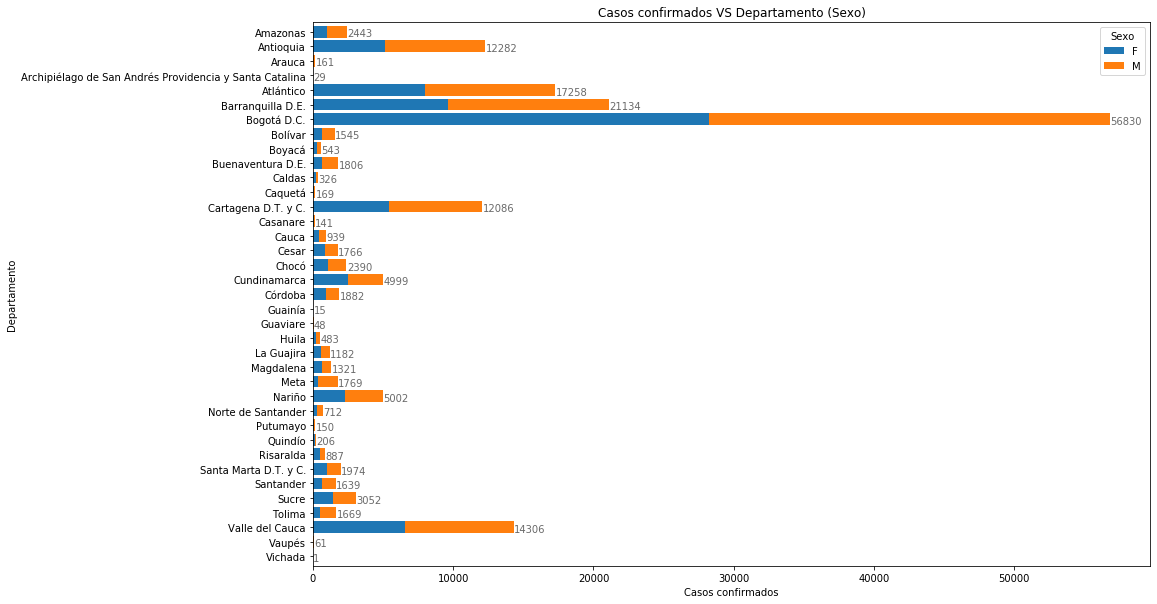

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               125      442      500   
Antioquia                                              436      951     3326   
Arauca                                                   5       33       65   
Archipiélago de San Andrés Providencia y Santa ...       0        1        8   
Atlántico                                              716     1225     3817   
Barranquilla D.E.                                      714     1238     4651   
Bogotá D.C.                                           2717     4563    13086   
Bolívar                                                 71      150      345   
Boyacá                                                  30       54      106   
Buenaventura D.E.                                       34      247      422   
Caldas                                                  12       20       70   
Caquetá                                                  6       12       55   
Cartagena D.T. y C.                                    477      831     2761   
Casanare                                                 7        7       41   
Cauca                                                   51       86      207   
Cesar                                                  158      195      401   
Chocó                                                  101      205      568   
Cundinamarca                                           253      377     1158   
Córdoba                                                 77      102      358   
Guainía                                                  0        2        5   
Guaviare                                                 0       18       10   
Huila                                                   29       48       92   
La Guajira                                              53      129      275   
Magdalena                                               75      101      234   
Meta                                                    25      124      587   
Nariño                                                 257      461     1167   
Norte de Santander                                      33       29      170   
Putumayo                                                 2       14       36   
Quindío                                                  8       13       31   
Risaralda                                               60       85      194   
Santa Marta D.T. y C.                                   88      151      411   
Santander                                               51      154      422   
Sucre                                                  119      241      667   
Tolima                                                  61      104      562   
Valle del Cauca                                        503     1037     3256   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                472      330      265   
Antioquia                                              3122     1854     1399   
Arauca                                                   39       10        5   
Archipiélago de San Andrés Providencia y Santa ...        9        6        3   
Atlántico                                              4088     2746     2248   
Barranquilla D.E.                                      5050     3262     2848   
Bogotá D.C.                                           12250     9072     7588   
Bolívar                                                 372      218      141   
Boyacá                                                  101       85 

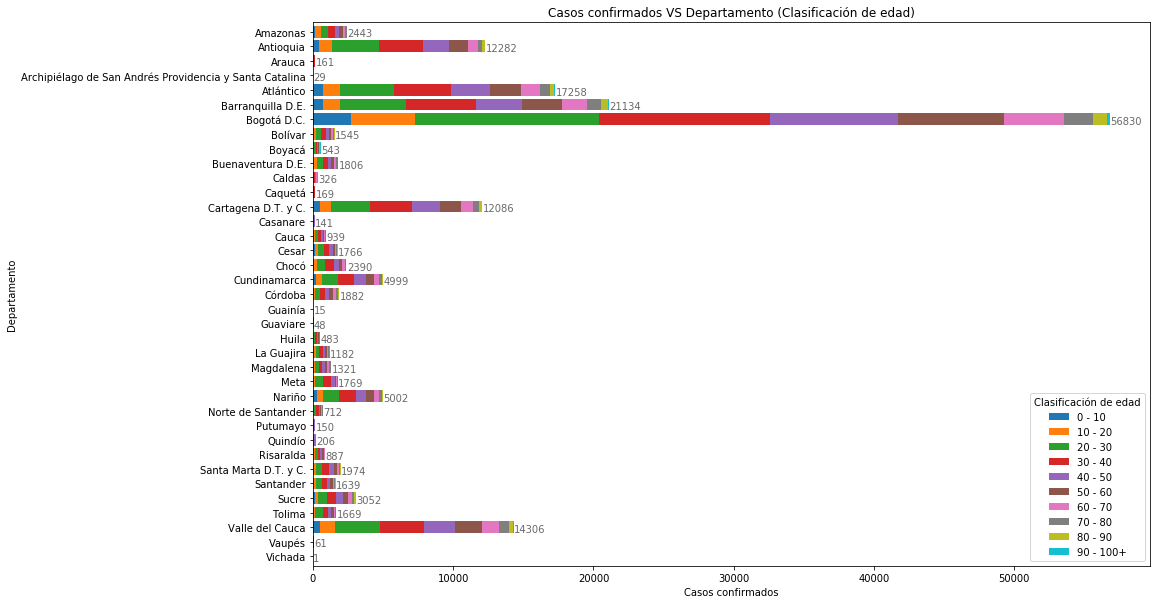

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               86.0      101.0   
Antioquia                                            7929.0      141.0   
Arauca                                                 82.0        0.0   
Archipiélago de San Andrés Providencia y Santa ...      7.0        0.0   
Atlántico                                            7316.0      814.0   
Barranquilla D.E.                                    8313.0     1224.0   
Bogotá D.C.                                         31223.0     1340.0   
Bolívar                                               610.0       73.0   
Boyacá                                                184.0       16.0   
Buenaventura D.E.                                     368.0      122.0   
Caldas                                                 61.0        7.0   
Caquetá                                               115.0        3.0   
Cartagena D.T. y C.                                  4143.0      403.0   
Casanare                                               72.0        1.0   
Cauca                                                 515.0       32.0   
Cesar                                                 629.0       37.0   
Chocó                                                 896.0       79.0   
Cundinamarca                                         2222.0      109.0   
Córdoba                                               800.0      240.0   
Guainía                                                 3.0        1.0   
Guaviare                                                9.0        0.0   
Huila                                                 115.0       15.0   
La Guajira                                            755.0       69.0   
Magdalena                                             470.0      138.0   
Meta                                                  575.0       19.0   
Nariño                                               1609.0      155.0   
Norte de Santander                                    370.0       33.0   
Putumayo                                               88.0       10.0   
Quindío                                                48.0        5.0   
Risaralda                                             373.0       21.0   
Santa Marta D.T. y C.                                1035.0       79.0   
Santander                                             906.0       32.0   
Sucre                                                1664.0      177.0   
Tolima                                                912.0       29.0   
Valle del Cauca                                      5848.0      503.0   
Vaupés                                                 34.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                10.0           7.0   
Antioquia                                              662.0          77.0   
Arauca                                                   5.0           1.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              632.0          99.0   
Barranquilla D.E.                                      930.0         130.0   
Bogotá D.C.                                           3104.0         161.0   
Bolívar                                                 88.0          10.0   
Boyacá                                                  34.0           3.0   
Buenaventura D.E.                                      114.0          17.0   
Caldas                                                  16.0           3.0   
Caquetá                                                 21.0           3.0   
Cartagena D.T. y C.  

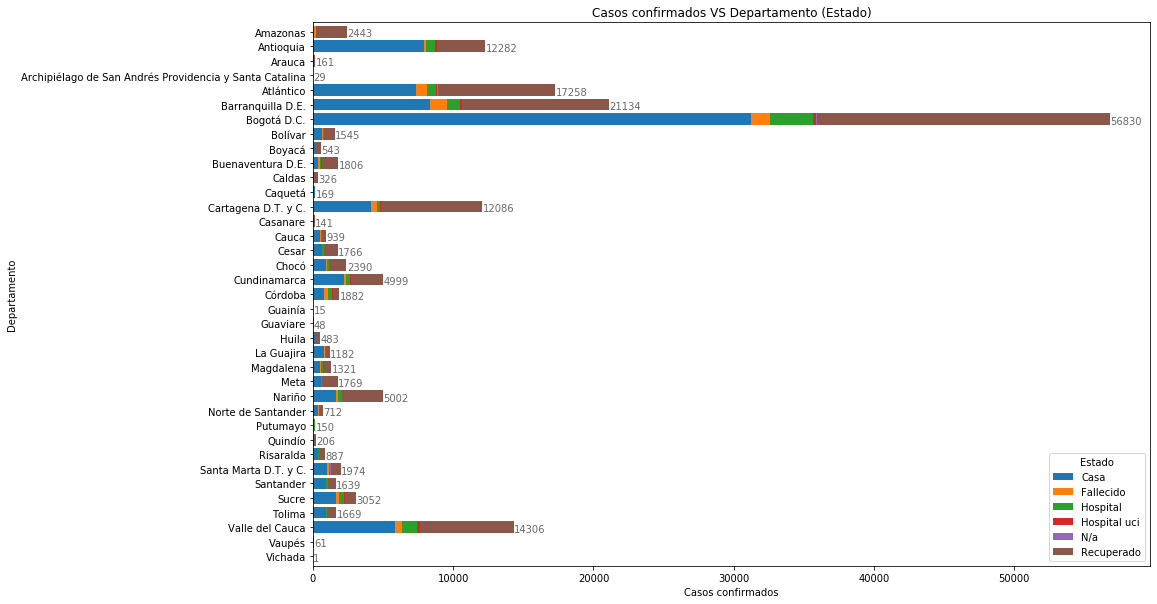

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          38141  42244
Fallecido      2274   3755
Hospital       3913   5304
Hospital uci    377    669
N/a             158    207
Recuperado    35354  40810

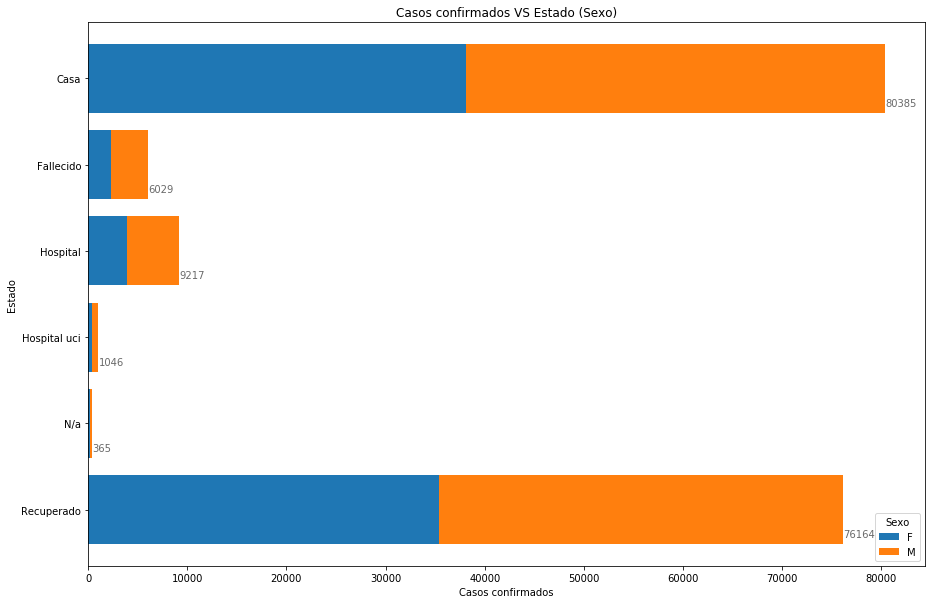

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3317     6268    20403    19930    12875     9836   
Fallecido                  12       12       82      221      494      925   
Hospital                  351      213      778     1194     1425     1889   
Hospital uci               48       25       43      115      150      230   
N/a                         9        8       14       17       24       44   
Recuperado               3621     6930    18763    18063    11870     9092   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      4837     2010      773        136  
Fallecido                 1423     1492     1109        259  
Hospital                  1639     1101      548         79  
Hospital uci               233      144       50          8  
N/a                         79       83       68         19  
Recuperado                4674     2170      852        129

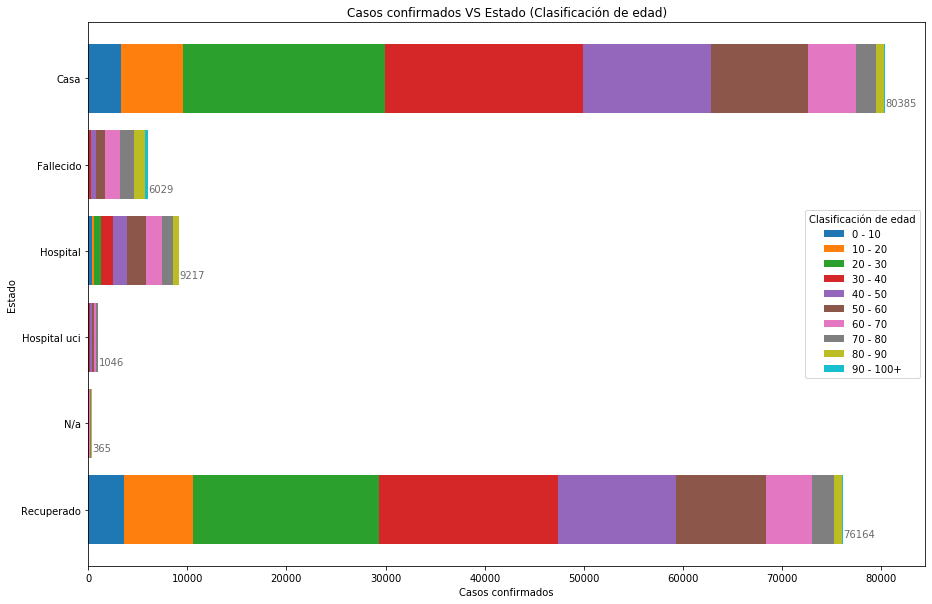

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F      M
Tipo                     
En estudio   74378  80871
Importado      450    515
Relacionado   5389  11603

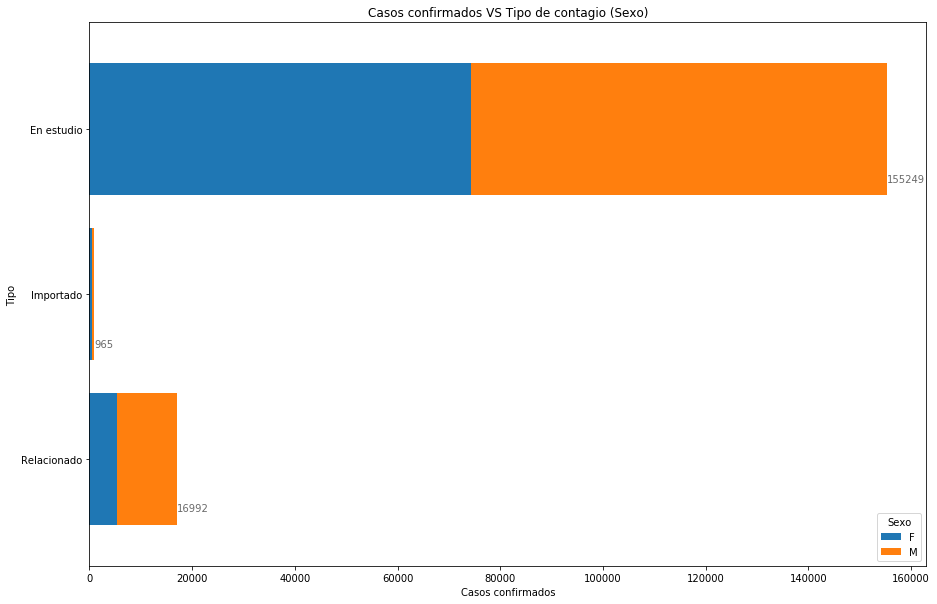

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               6543    11127    35035    35258    24530    20335   
Importado                   5       35      239      226      171      149   
Relacionado               810     2294     4809     4056     2137     1532   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               12025     6599     3209        588  
Importado                   95       35        9          1  
Relacionado                765      366      182         41

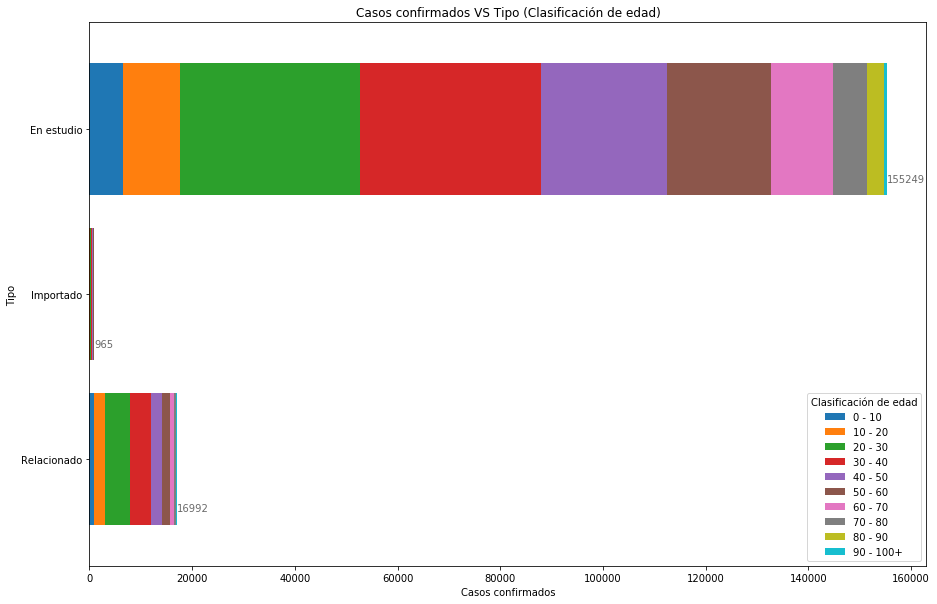

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  3711   3647
10 - 20                 6105   7351
20 - 30                18663  21420
30 - 40                17971  21569
40 - 50                12446  14392
50 - 60                10170  11846
60 - 70                 5930   6955
70 - 80                 3176   3824
80 - 90                 1685   1715
90 - 100+                360    270

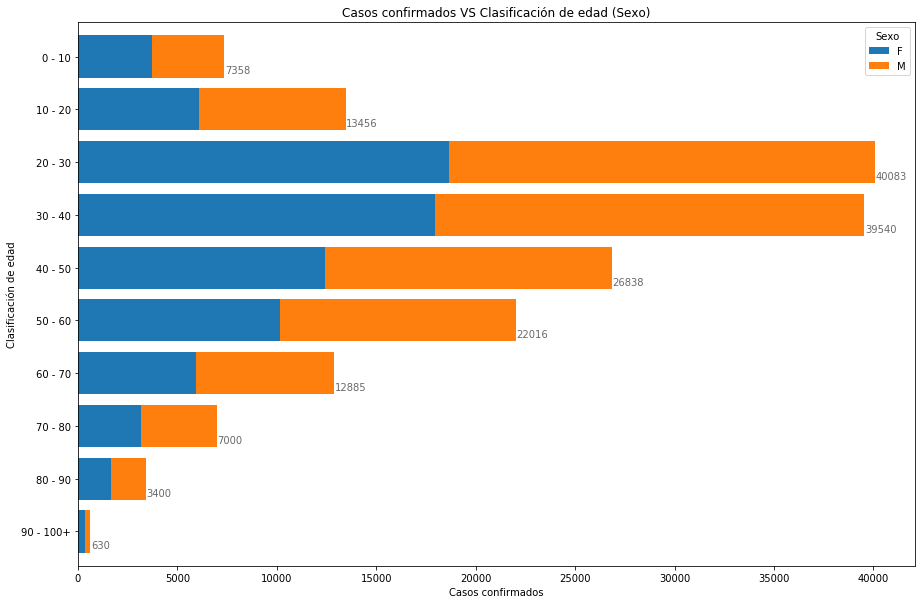

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3317         12       351            48    9   
10 - 20                 6268         12       213            25    8   
20 - 30                20403         82       778            43   14   
30 - 40                19930        221      1194           115   17   
40 - 50                12875        494      1425           150   24   
50 - 60                 9836        925      1889           230   44   
60 - 70                 4837       1423      1639           233   79   
70 - 80                 2010       1492      1101           144   83   
80 - 90                  773       1109       548            50   68   
90 - 100+                136        259        79             8   19   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       3621  
10 - 20                      6930  
20 - 30                     18763  
30 - 40                     18063  
40 - 50                     11870  
50 - 60                      9092  
60 - 70                      4674  
70 - 80                      2170  
80 - 90                       852  
90 - 100+                     129

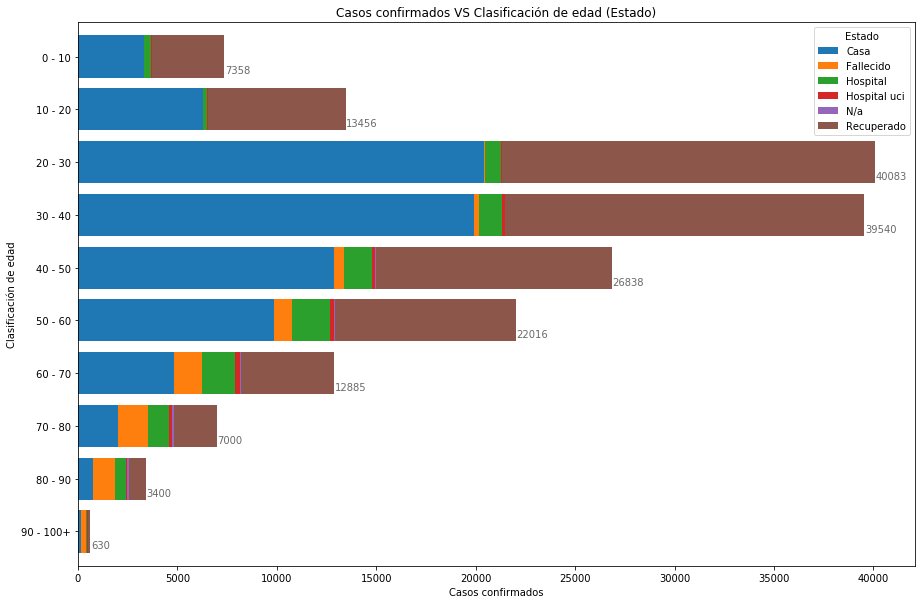

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-12            2246.0  2461.0
2020-07-13            2915.0  3272.0
2020-07-14            2869.0  3386.0
2020-07-15            2098.0  2349.0
2020-07-16            1065.0  1033.0

[130 rows x 2 columns]

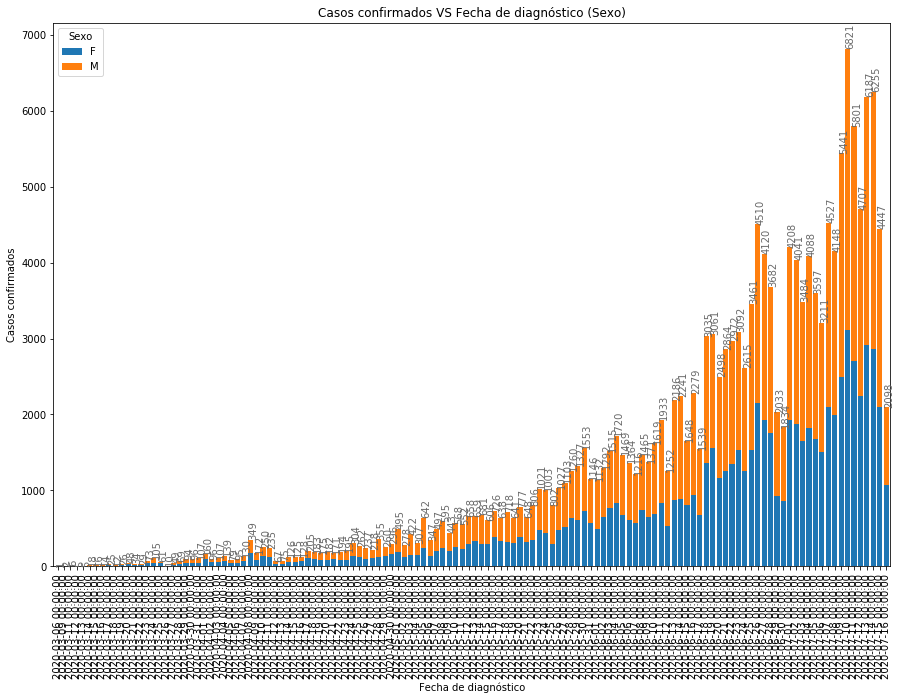

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-12                191      352     1080     1069      770      631   
2020-07-13                208      399     1455     1430      996      830   
2020-07-14                232      454     1465     1440     1029      786   
2020-07-15                171      323      988      991      711      595   
2020-07-16                106      143      491      499      358      283   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-12                 351      173       78         12  
2020-07-13                 491      244      114         20  
2020-07-14                 439      239      147         24  
2020-07-15                 356      211       87         14  
2020-07-16                 133       59       24          2  

[130 rows x 10 columns]

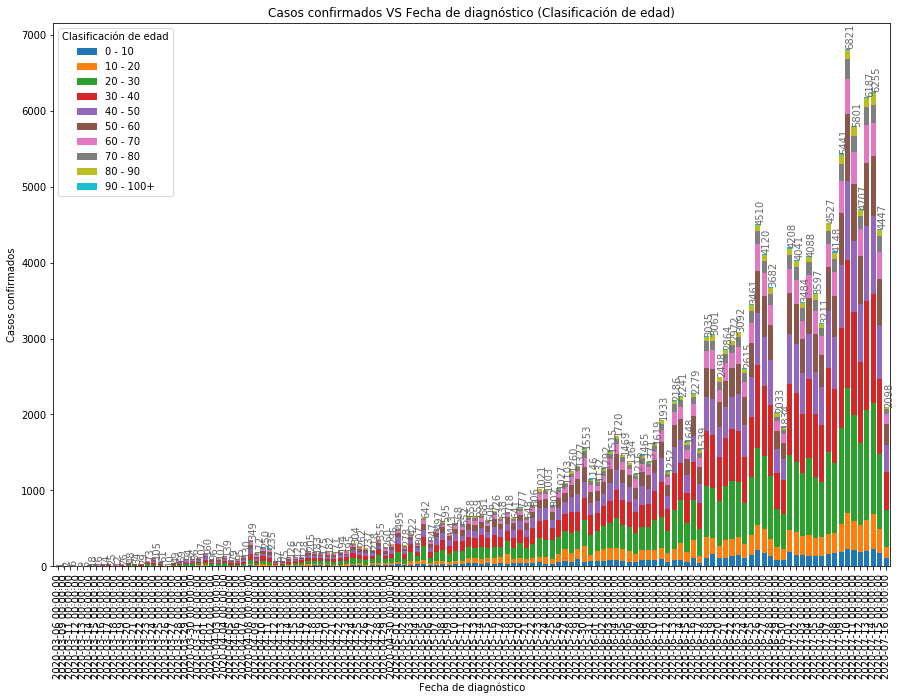

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-12            4241.0      103.0     327.0          25.0  4.0   
2020-07-13            5464.0      102.0     484.0          37.0  6.0   
2020-07-14            5610.0      102.0     455.0          48.0  2.0   
2020-07-15            4003.0       26.0     382.0          36.0  0.0   
2020-07-16            1990.0        0.0     104.0           4.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-12                   7.0  
2020-07-13                  94.0  
2020-07-14                  38.0  
2020-07-15                   0.0  
2020-07-16                   0.0  

[130 rows x 6 columns]

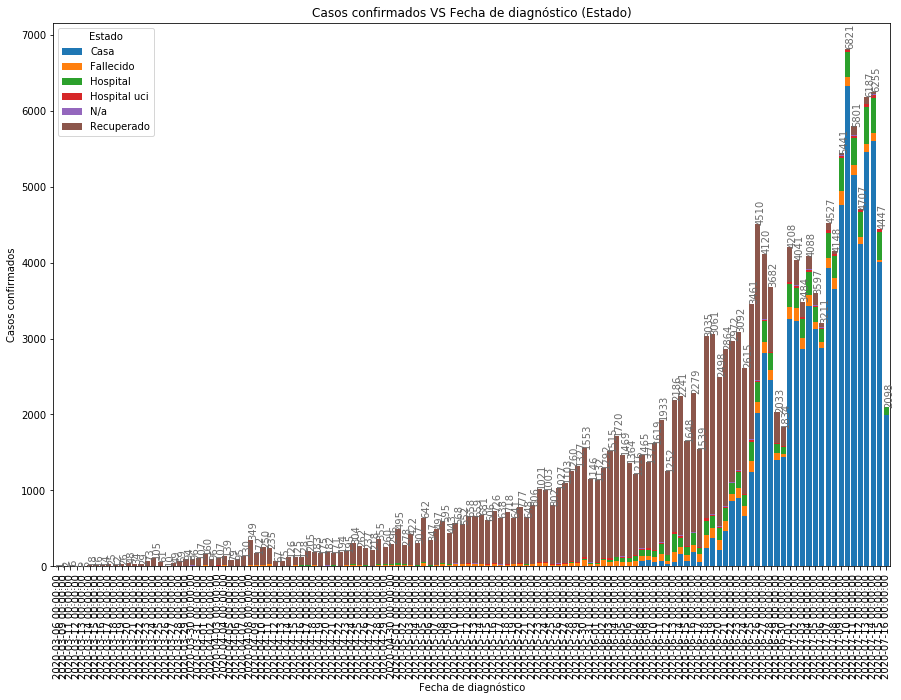

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                        F        M
Fecha de diagnóstico                  
2020-03-06                1.0      0.0
2020-03-09                2.0      1.0
2020-03-11                6.0      3.0
2020-03-12               11.0      3.0
2020-03-13               13.0      6.0
...                       ...      ...
2020-07-12            69530.0  80983.0
2020-07-13            72445.0  84255.0
2020-07-14            75314.0  87641.0
2020-07-15            77412.0  89990.0
2020-07-16            78477.0  91023.0

[130 rows x 2 columns]

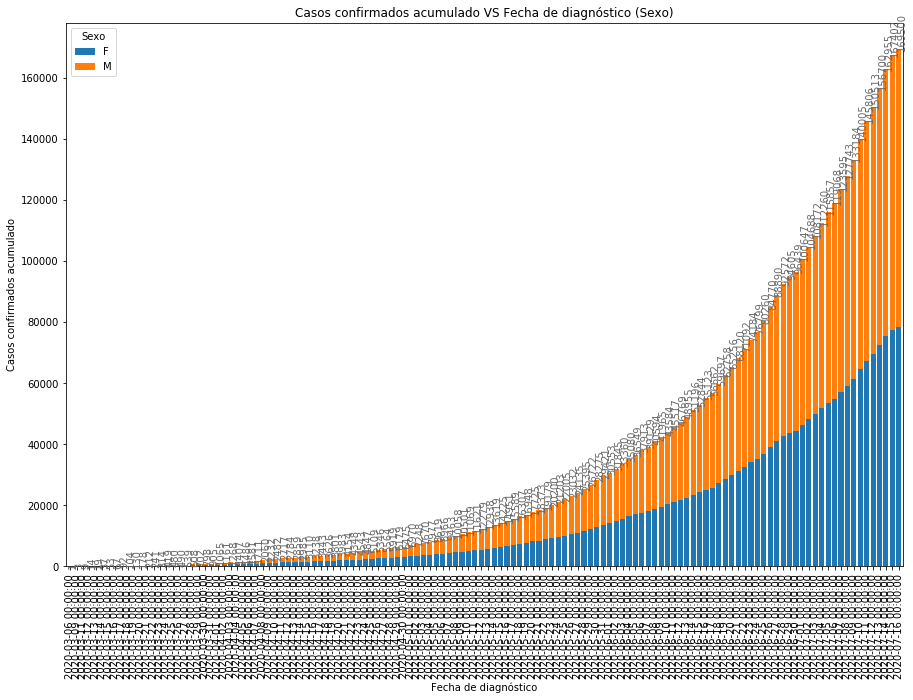

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-12               6513    11866    34805    34287    23196    19068   
2020-07-13               6721    12265    36260    35717    24192    19898   
2020-07-14               6953    12719    37725    37157    25221    20684   
2020-07-15               7124    13042    38713    38148    25932    21279   
2020-07-16               7230    13185    39204    38647    26290    21562   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-12               11185     6089     2944        560  
2020-07-13               11676     6333     3058        580  
2020-07-14               12115     6572     3205        604  
2020-07-15               12471     6783     3292        618  
2020-07-16               12604     6842     3316        620  

[130 rows x 10 columns]

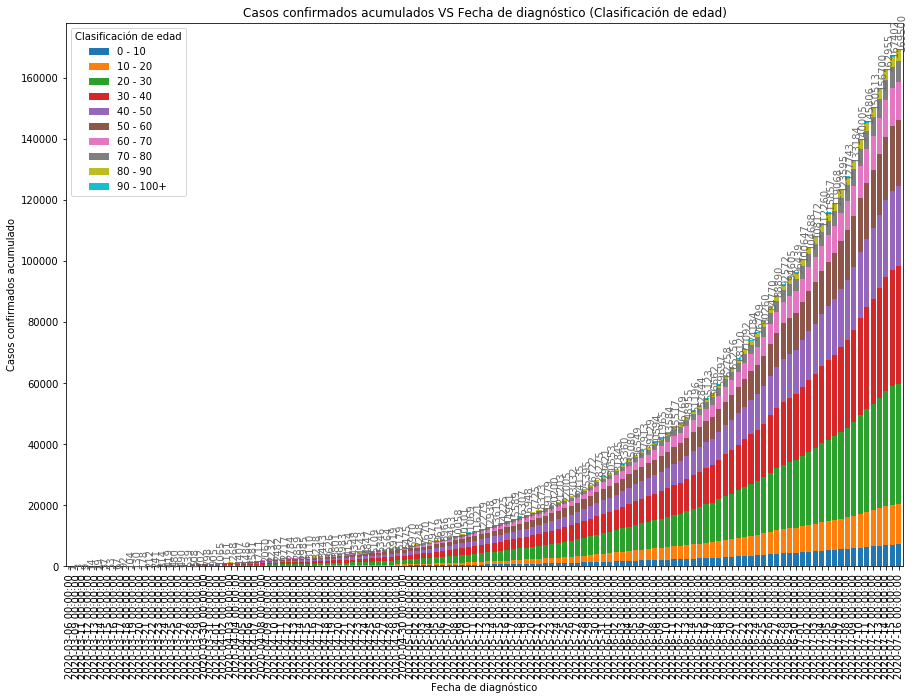

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-12            62832.0     5641.0    7635.0         885.0  340.0   
2020-07-13            68296.0     5743.0    8119.0         922.0  346.0   
2020-07-14            73906.0     5845.0    8574.0         970.0  348.0   
2020-07-15            77909.0     5871.0    8956.0        1006.0  348.0   
2020-07-16            79899.0     5871.0    9060.0        1010.0  348.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-12               73180.0  
2020-07-13               73274.0  
2020-07-14               73312.0  
2020-07-15               73312.0  
2020-07-16               73312.0  

[130 rows x 6 columns]

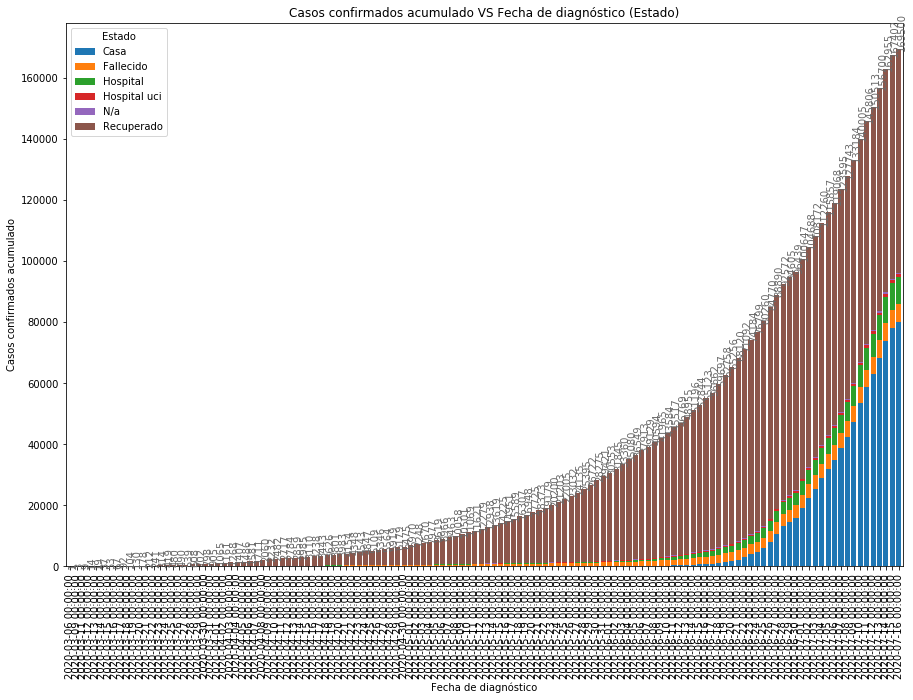

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>